In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [15]:
# creating a synthetic data set

np.random.seed(42) # stable seed

X = 2 * np.random.rand(100, 2) # data pts

true_noise = np.array([3, 4]) # creating noise

y = X @ true_noise + 5 + np.random.rand(100) # target = array * vector + noise + 5 + array

In [16]:
X_b = np.c_[np.ones((100,1)),X] # adding 1 column of 1's for bias/error

In [17]:
# cost function

def comp_cost(X,y, theta):
    m = len(y) # m number of terms
    pred = X @ theta
    cost = (1/(2*m)) * np.sum((pred - y) ** 2)
    return cost

In [18]:
# creating batch gradient descent iterator 

def batch_descent(X, y, theta, lr = 0.1 , iterate = 100):
    m = len(y)
    history = [] # storage

    for i in range(iterate):
        gradient = (1/m) * X.T @ (X @ theta -y ) # derivative part
        theta = theta - lr * gradient # updating w 
        cost = comp_cost(X,y,theta)
        history.append(cost)

    return theta, history

In [19]:
# innit two different points 

theta_1 = np.random.randn(3)
theta_2 = np.random.randn(3)

# running the model 

theta1_final, history_1 = batch_descent(X_b, y, theta_1)
theta2_final, history_2 = batch_descent(X_b, y, theta_2)



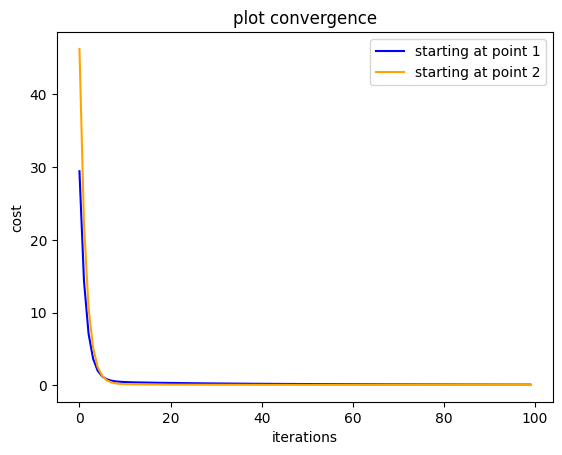

In [34]:
plt.plot(history_1,label = 'starting at point 1', color = 'blue')
plt.plot(history_2,label = 'starting at point 2' , color = 'orange')

plt.xlabel('iterations')
plt.ylabel('cost')

plt.title("plot convergence")

plt.legend()

plt.show()

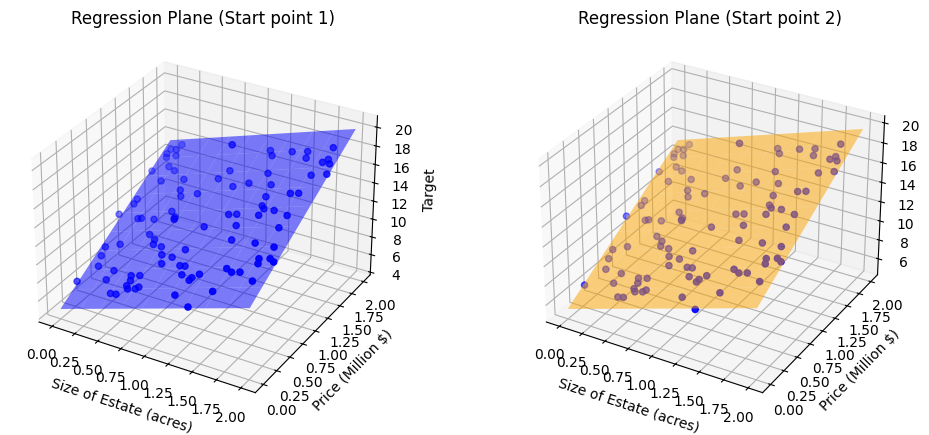

In [36]:

print("\033[31mWarning :The Below subplots are not same , yet there is very minute difference in the data !\033[0m")

fig = plt.figure(figsize=(12, 5))

# Plot with theta1
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], y, color='blue', label='Data points')
x0 = np.linspace(0, 2, 10)
x1 = np.linspace(0, 2, 10)
x0, x1 = np.meshgrid(x0, x1)
y_pred = theta1_final[0] + theta1_final[1]*x0 + theta1_final[2]*x1
ax1.plot_surface(x0, x1, y_pred, alpha=0.5, color='blue')
ax1.set_xlabel('Size of Estate (acres)')
ax1.set_ylabel('Price (Million $)')
ax1.set_zlabel('Target')
ax1.set_title('Regression Plane (Start point 1)')

# Plot with theta2
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], y, color='blue', label='Data points')
y_pred = theta2_final[0] + theta2_final[1]*x0 + theta2_final[2]*x1
ax2.plot_surface(x0, x1, y_pred, alpha=0.5, color='orange')
ax2.set_xlabel('Size of Estate (acres)')
ax2.set_ylabel('Price (Million $)')
ax2.set_zlabel('Target')
ax2.set_title('Regression Plane (Start point 2)')

plt.show()

plt.show()
